## PSV10: 10 Degree Bin Location Grouping and Residual Plots 

### Location Grouping by 10 deg latitude bins to give 16 data groups

### The PSV10 data will be sorted to only include Age values within 0 to 5 MA and within 45 degrees of Model VGP Latitutdes so that only Normal Polarities are included.

#### The PSV10 data excel file is first adjusted to only include columns with numeric values and is then converted to a csv file so that it can be read into. Data with AGE values less than 5 MA and Model VGP latitudes greater than 45 degrees are sorted by increasing Latitude. Relevant columns are called to the Dataframe 'psv5new' and will be used to calculate average inclination, declination, latitude, longitude, and residual values. 

In [52]:
import pandas as pd

pd.set_option('display.max_rows', 10)

psv = pd.read_csv('..\data\PSV0.csv')

psv5 = psv[ (psv.age <= 5.00) & (psv.model_vgp_lat > 45) ] # model_vgp_lat >45 indicates normal polarity

psv5.sort_values(['site_lat']) 

psv5new = pd.DataFrame()

#*Update* for correct columns listed below (when uploading new data)

psv5new['LAT'] = psv5.site_lat
psv5new['LONG'] = psv5.site_lon
psv5new['AGE'] = psv5.age
psv5new['AGE_pm'] = psv5.age_pm
psv5new['AGE_high'] = psv5.age_high
psv5new['AGE_low'] = psv5.age_low
psv5new['Dec'] = psv5.dec
psv5new['Inc'] = psv5.inc
psv5new['K'] = psv5.k
psv5new['Model_vlat'] = psv5.model_vgp_lat

psv5new.reset_index(inplace=True, drop=True) # reset index 

psv5new

,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat
0,-39.300000,175.600000,-0.024000,0.276,999.000000,999.000000,15.8,-50.6,382.8125,74.9
1,-7.590000,110.426000,0.000000,999.000,999.000000,999.000000,354.9,-33.4,462.5000,78.2
2,19.123500,97.537700,0.000000,0.020,999.000000,999.000000,9.6,27.8,233.7000,79.8
3,4.933610,-75.467330,0.000000,0.050,999.000000,999.000000,6.0,7.0,193.0000,83.9
4,19.480000,257.780000,0.000063,999.000,0.000066,0.000059,10.7,37.8,238.0000,79.8
...,...,...,...,...,...,...,...,...,...,...
1588,-7.567000,110.464000,4.650000,999.000,6.700000,2.590000,350.5,-28.1,443.7000,77.8
1589,-7.567000,110.464000,4.650000,999.000,6.700000,2.590000,0.8,-28.4,173.0000,82.0
1590,-7.502000,110.439000,4.650000,999.000,6.700000,2.590000,353.7,-4.4,228.0000,82.1
1591,-0.457333,37.092333,4.810000,0.260,999.000000,999.000000,357.2,27.9,195.0000,73.6


In [53]:
psv5newn = psv5new.copy() #copy table to a new one as to not revert previous setting on table

psv5newn = psv5newn.sort_values(['LAT','LONG']) #sort by increasing Latitude values
psv5newn.reset_index(inplace=True) #reset index column

psv5newn

,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat
0,1556,-78.400,164.2100,4.000,999.000,8.00,0.00,296.5,-78.0,258.4,69.5
1,577,-78.390,164.2000,0.280,0.010,999.00,999.00,270.9,-78.1,114.5,64.7
2,1557,-78.390,164.2000,4.000,999.000,8.00,0.00,192.7,-83.1,140.5,64.5
3,362,-78.390,164.2100,0.084,0.004,999.00,999.00,263.1,-85.9,188.0,75.1
4,457,-78.390,164.2300,0.120,0.010,999.00,999.00,293.6,-84.0,273.0,77.2
...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.038,-8.4543,0.240,999.000,0.24,0.24,338.9,73.7,1096.0,75.8
1589,549,71.038,-8.4347,0.240,999.000,0.24,0.24,192.6,81.4,795.0,54.4
1590,794,79.260,13.6100,0.500,999.000,1.00,0.00,355.5,54.3,1413.0,45.6
1591,792,79.440,13.3300,0.500,999.000,1.00,0.00,53.5,82.4,1457.0,77.9


#### This function returns a bin label within -7 to 7 corresponding to the specified range. This is then applied to the Latitude column and creates the Bin column. 

In [54]:
import numpy as np 
pd.set_option('display.max_rows', 10)

def bin_groups(x):
    if x <= -70:                   # Group 1
        return -7
    elif x <= -60 and x > -70:     # Group 2
        return -6
    elif x <= -50 and x > -60:     # Group 3
        return -5
    elif x <= -40 and x > -50:     # Group 4
        return -4
    elif x <= -30 and x > -40:     # Group 5
        return -3
    elif x <= -20 and x > -30:     # Group 6 
        return -2
    elif x <= -10 and x > -20:     # Group 7
        return -1
    elif x < 0 and x > -10:       # Group 8, -10 to 0 
        return '-0'
    elif x > 0 and x < 10:        # Group 9, 0 to 10
        return '+0'
    elif x >= 10 and x < 20:       # Group 10 
        return 1
    elif x >= 20 and x < 30:       # Group 11
        return 2
    elif x >= 30 and x < 40:       # Group 12
        return 3
    elif x >= 40 and x < 50:       # Group 13
        return 4
    elif x >= 50 and x < 60:       # Group 14
        return 5
    elif x >= 60 and x < 70:       # Group 15
        return 6
    elif x >= 70 and x < 80:       # Group 16
        return 7
    else:
        return 0
df = psv5newn
df['Binn'] = df['LAT'].apply(bin_groups)
df

,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,Binn
0,1556,-78.400,164.2100,4.000,999.000,8.00,0.00,296.5,-78.0,258.4,69.5,-7
1,577,-78.390,164.2000,0.280,0.010,999.00,999.00,270.9,-78.1,114.5,64.7,-7
2,1557,-78.390,164.2000,4.000,999.000,8.00,0.00,192.7,-83.1,140.5,64.5,-7
3,362,-78.390,164.2100,0.084,0.004,999.00,999.00,263.1,-85.9,188.0,75.1,-7
4,457,-78.390,164.2300,0.120,0.010,999.00,999.00,293.6,-84.0,273.0,77.2,-7
...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.038,-8.4543,0.240,999.000,0.24,0.24,338.9,73.7,1096.0,75.8,7
1589,549,71.038,-8.4347,0.240,999.000,0.24,0.24,192.6,81.4,795.0,54.4,7
1590,794,79.260,13.6100,0.500,999.000,1.00,0.00,355.5,54.3,1413.0,45.6,7
1591,792,79.440,13.3300,0.500,999.000,1.00,0.00,53.5,82.4,1457.0,77.9,7


#### This is the calculation for the individual Inclination Residuals and the standard deviation of the Inclination using the Fisher method. Here, cartesian  X, Y, and Z values are created for the Longitude & Latitude and Declination & Inclination, respectively. 

In [55]:
df["Igad"] = np.degrees(np.arctan(2*np.tan(np.radians(df.LAT)))) # degrees

df["\u0394I"] =  ((df["Inc"]) - df["Igad"])
df["AGE_unc"] = df["AGE_high"] - df["AGE_low"]

df["I stdv"] = 81/np.sqrt(np.abs(df["K"])) #inc stdv 


igadcol = df.iloc[:, df.columns.get_loc("Igad")]
igadglobal = np.average(igadcol) #= ZAm^2
print("Global Axial Dipole, Igad:", igadglobal) # vadm global 

latr = np.radians(df.LAT)                       # converts Lat and Long values into radians
longr = np.radians(df.LONG)

df['X']= np.cos(latr)*np.cos(longr)             # convert Lat and Long to cartesian X,Y,Z coordinates and creates X, Y, and Z columns 
df['Y']= np.cos(latr)*np.sin(longr)
df['Z']= np.sin(latr)

dr = np.radians(df.Dec)                         # converts Dec and Inc values into radians
incr = np.radians(df.Inc)

df['X2']= np.cos(dr)*np.cos(incr)               # convert dec and inc to cartesian X,Y,Z coordinates and creates X2, Y2, and Z2 columns 
df['Y2']= np.cos(dr)*np.sin(incr)
df['Z2']= np.sin(dr)

df

Global Axial Dipole, Igad: 16.59828570572618


,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,Binn,Igad,ΔI,AGE_unc,I stdv,X,Y,Z,X2,Y2,Z2
0,1556,-78.400,164.2100,4.000,999.000,8.00,0.00,296.5,-78.0,258.4,69.5,-7,-84.139952,6.139952,8.0,5.038935,-0.193490,0.054716,-0.979575,0.092770,-0.436447,-0.894934
1,577,-78.390,164.2000,0.280,0.010,999.00,999.00,270.9,-78.1,114.5,64.7,-7,-84.134795,6.034795,0.0,7.569763,-0.193645,0.054796,-0.979540,0.003239,-0.015370,-0.999877
2,1557,-78.390,164.2000,4.000,999.000,8.00,0.00,192.7,-83.1,140.5,64.5,-7,-84.134795,1.034795,8.0,6.833558,-0.193645,0.054796,-0.979540,-0.117198,0.968469,-0.219846
3,362,-78.390,164.2100,0.084,0.004,999.00,999.00,263.1,-85.9,188.0,75.1,-7,-84.134795,-1.765205,0.0,5.907532,-0.193655,0.054762,-0.979540,-0.008589,0.119829,-0.992757
4,457,-78.390,164.2300,0.120,0.010,999.00,999.00,293.6,-84.0,273.0,77.2,-7,-84.134795,0.134795,0.0,4.902343,-0.193674,0.054695,-0.979540,0.041848,-0.398156,-0.916363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.038,-8.4543,0.240,999.000,0.24,0.24,338.9,73.7,1096.0,75.8,7,80.252141,-6.552141,0.0,2.446694,0.321410,-0.047773,0.945734,0.261849,0.895454,-0.359997
1589,549,71.038,-8.4347,0.240,999.000,0.24,0.24,192.6,81.4,795.0,54.4,7,80.252141,1.147859,0.0,2.872774,0.321426,-0.047663,0.945734,-0.145934,-0.964944,-0.218143
1590,794,79.260,13.6100,0.500,999.000,1.00,0.00,355.5,54.3,1413.0,45.6,7,84.582412,-30.282412,1.0,2.154835,0.181120,0.043851,0.982483,0.581742,0.809580,-0.078459
1591,792,79.440,13.3300,0.500,999.000,1.00,0.00,53.5,82.4,1457.0,77.9,7,84.674778,-2.274778,1.0,2.122048,0.178328,0.042253,0.983064,0.078669,0.589598,0.803857


In [56]:
X_col = df.columns.get_loc("X")
Z_col = df.columns.get_loc("Z")
apsv5newn =  df.iloc[:, X_col:Z_col+1].values # each row needs its own x,y,z array

#### This table presents the average Latitude and Longitudes as well as Declination and Inclinations for the created bins. Several other relevant calculations are made for the data groups including: average declination, average inclination, average Igad, and weighted and non-weighted Residual (ΔI) standard deviation. 

In [57]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

avglat = []             # Average Latitude of group
avglong = []            # Average Longitude of group 
avgdec = []             # Average Declination of group
avginc = []             # Average Inclination of group 
avgincstdv = []         # Standard Deviation from the Inclination
degreefa = []           # Degrees from Average group location 
avgIgadgroups = []      # Average Calculated Igad 
groupcount = []         # Counts the number of data points within a group 
delIstdvs_weight = []   # Calculates the weighted ΔI stdv
delIstdv = []           # Calculates the non-weighted ΔI stdv
Istdvs_weight = []      # Calculates the weighted stdv for the group I stdv 
age_range = []          # Calculated the Max age - Min age of the group to give the age range
age_range_min = []      # Minimum age within a group
age_range_max = []      # Maximum age within a group

avgdel_I = []

startIndex = 0
endIndex = 0
length = len(df)
inc_col = df.columns.get_loc("Inc")
age_col = df.columns.get_loc("AGE")
dec_col = df.columns.get_loc("Dec")

X_col = df.columns.get_loc("X")
Z_col = df.columns.get_loc("Z")
X2_col = df.columns.get_loc("X2") # corresponds to x cartesian value for Dec and Inc
Z2_col = df.columns.get_loc("Z2") # corresponds to z cartesian value for Dec and Inc


del_I_col = df.columns.get_loc("\u0394I")
Igad_col = df.columns.get_loc("Igad")
Istdv_col = df.columns.get_loc("I stdv")
Inc_col = df.columns.get_loc("Inc")


for rowIndex, value in df.Binn.items():
    
    if rowIndex == 0 or (value == df["Binn"][rowIndex - 1] and endIndex != length - 1):   # This averages over rows with the same Binn value
        endIndex += 1
        avglat.append('\/')
        avglong.append('\/')
        avgdec.append('\/')
        avginc.append('\/')
        avgincstdv.append('\/')
        avgIgadgroups.append('\/')
        groupcount.append('\/')
        delIstdvs_weight.append('\/')
        delIstdv.append('\/')
        Istdvs_weight.append('\/')
        age_range.append('\/')
        age_range_min.append('\/')
        age_range_max.append('\/')
        avgdel_I.append('\/')
          
    elif startIndex != endIndex:
        
        cartpos = df.iloc[startIndex:endIndex+1, X_col:Z_col+1]                # individual cartesian XYZ columns for lat and long for the length of a group
        avgcart = np.average(cartpos.values, axis=0)                           # averages over the XYZ cartesian columns 
                
        x1 = avgcart[0]                                                        # the average X value of lat and long for a group 
        y1 = avgcart[1]                                                        # the average Y of lat and long for a group
        z1 = avgcart[2]                                                        # the average Z of lat and long for a group
        
        lt = np.degrees(np.arcsin(z1))                                         # converts averaged cartesian location to latitude in degrees 
        lg = np.degrees(np.arctan2(y1,x1))                                     # converts averaged cartesian location to longitude in degrees      
       
        avglat.append(lt)                                                      # updates avglat column with the averaged latitude for a group 
        avglong.append(lg)                                                     # updates avglong column with the averaged longitude for a group 

        cartpos_DecInc = df.iloc[startIndex:endIndex+1, X2_col:Z2_col+1]       # individual cartesian XYZ columns for declination and inclination for the length of a group 
        avgcart_DecInc = np.average(cartpos_DecInc.values, axis=0)             # averages over the XYZ declination and inclination coumns
                
        x2 = avgcart_DecInc[0]                                                 # the average X value of dec and inc for a group
        y2 = avgcart_DecInc[1]                                                 # the average Y value of dec and inc for a group
        z2 = avgcart_DecInc[2]                                                 # the average Z value of dec and inc for a group
        
        dec = np.degrees(np.arcsin(z2))                                        # converts the averaged cartesian location to declination in degrees 
        inc = np.degrees(np.arctan2(y2,x2))                                    # converts the averaged cartesian location to inclination in degrees 
        
        avgdec.append(dec)                                                     # updates avgdec column with the averaged decliantion for a group
        avginc.append(inc)                                                     # updates avginc column with the averaged inclination for a group
        
        index = rowIndex - 1                                                   # group index 
        
        inclinationstdv = np.std(df.iloc[startIndex:endIndex+1, Inc_col])      # standard deviation over recorded (non-calculated) Inclinations for a group
        avgincstdv.append(inclinationstdv)                                     # updates avgincstdv with this standard deviation for a group 
        
        igadgroup = df.iloc[startIndex:endIndex+1, Igad_col]                   # calls the Igad column values for a group
        avgigad = np.average(igadgroup.values, axis=0)                         # averages over the Igad column for a group
        avgIgadgroups.append(avgigad)                                          # updates avgIgadgroups with this avgigad value
        
        groupcount.append(cartpos.shape[0])                                    # updates groupcount with length of the cartpos to give the amount of data within a group
        
        Icalculatedgroup = df.iloc[startIndex:endIndex+1, Istdv_col]           # calls the I stdv col for a group from: df["I stdv"] = 81/np.sqrt(np.abs(df["K"]))  
     
        Istdvgroup_weighted = np.std(Icalculatedgroup) / np.sqrt(cartpos.shape[0])   # the standard deviation of I stdv divided by N, amount of data points in group 
        Istdvs_weight.append(Istdvgroup_weighted)                                     # updates the Istdvs_weight with this Istdvgroup_weighted standard deviation            

        
        delIcalculatedgroup = df.iloc[startIndex:endIndex+1, del_I_col]        # calls the ΔI column from: df["\u0394I"] =  ((df["Inc"]) - df["Igad"])

        delIstdvgroup = np.std(delIcalculatedgroup)                                         # non-weighted ΔI stdv
        delIstdv.append(delIstdvgroup)                                                      # updates delIstdv with delIstdvgroup_weighted stdv
                
        delIstdvgroup_weighted = (np.std(delIcalculatedgroup)) / np.sqrt(cartpos.shape[0])  # weighted ΔI stdv = stdv of ΔI for a group divided by N
        delIstdvs_weight.append(delIstdvgroup_weighted)                                     # updates delIstdv_weight with the weighted stdv, delIstdvgroup_weighted
        
        
        del_I_calcgroupavg = np.average(delIcalculatedgroup.values, axis=0)                 # average of the non-weighted ΔI stdv
        avgdel_I.append(del_I_calcgroupavg)                                                 # updates avgdel_I with averages, del_I_calcgroupavg
        
        agegroup = df.iloc[startIndex:endIndex+1, age_col]                                  # calls the age column for a group
        age_range_calc = (max(agegroup) - min(agegroup))                                    # subtract the min within the age column for a group from the max to give the age 
        age_range.append(age_range_calc)            #updates age_range with this value      #   range of a group
                                        
        age_range_mincal = min(agegroup)                                                    # minimum of an age range for a group
        age_range_min.append(age_range_mincal)                                              # updates age_range_min with this minimum age 
        
        age_range_maxcal = max(agegroup)                                                    # maximum of an age range for a group
        age_range_max.append(age_range_maxcal)                                              # updates age_range_max with this maximum age
        
               
        while index >= 0 and avglat[index] == '\/':                                         # indexes the newly created columns with their respective input values
            avglat[index] = lt
            avglong[index] = lg
            avgdec[index] = dec
            avginc[index] = inc
            avgincstdv[index] = inclinationstdv
            avgIgadgroups[index] = avgigad
            groupcount[index] = cartpos.shape[0]
            delIstdvs_weight[index] = delIstdvgroup_weighted
            delIstdv[index] = delIstdvgroup
            Istdvs_weight[index] = Istdvgroup_weighted
            age_range[index] = age_range_calc
            age_range_min[index] = age_range_mincal
            age_range_max[index] = age_range_maxcal
            
            avgdel_I[index] = del_I_calcgroupavg
            
            index -= 1
        
        startIndex = rowIndex + 1                                                         # does so for the length of a group
        endIndex = startIndex
        
    else: 
        avglat.append('0')
        avglong.append('0')
        avgdec.append('0')
        avginc.append('0')
        avgincstdv.append('0')
        avgIgadgroups.append('0')
        groupcount.append('0')
        delIstdvs_weight.append('0')
        delIstdv.append('0')
        Istdvs_weight.append('0')
        age_range.append('0')
        age_range_min.append('0')
        age_range_max.append('0')
        
        avgdel_I.append('0')
        
        
        startIndex = rowIndex + 1
        endIndex = startIndex

df["AvgLat"] = pd.Series(avglat)         # Avg latitude of a group 
df["AvgLong"] = pd.Series(avglong)       # Avg longitude of a group 
 
df["AvgDec"] = pd.Series(avgdec)         # Avg Declination of a group 
df["AvgInc"] = pd.Series(avginc)         # Avg Inclination of a group 
df["AvgIStdv"] = pd.Series(avgincstdv)   # Avg stdv of I of a group 


# Find the Degrees from the calculated Avgerage location (avglat and avglong) for each data point 
# Converting to cartesian then taking the dot between the original location and avg location

latra = np.radians(df.AvgLat.astype(float))
longra = np.radians(df.AvgLong.astype(float))

df['X_a']= np.cos(latra)*np.cos(longra)         # cartesian X value of average latitude and longitude for a group 
df['Y_a']= np.cos(latra)*np.sin(longra)         # cartesian Y value of average latitude and longitude for a group
df['Z_a']= np.sin(latra)                        # cartesian Z value of average latitude and longitude for a group
 
X_a_col = df.columns.get_loc("X_a")
Z_a_col = df.columns.get_loc("Z_a")+1

SSavgarr = df.iloc[:, X_a_col:Z_a_col].values   # array of all X_a,Y_a, Z_a

for row in range(len(SSavgarr)):
    a = (apsv5newn[row,:])                      # array of X_a,Y_a, Z_a
    b = (SSavgarr[row,:])                       # array of X, Y, Z
    d = np.dot(a,b)
    
    if 1.000000 <= d <= 1.2:
        d = 1.00
    
    degreefa.append(np.degrees(np.arccos(d)))   # updates degreefa with the calculated degrees from average location

df["DegreeFmAvg"] = pd.Series(degreefa)

df["IStdvWeighted"] = pd.Series(Istdvs_weight)
df["ΔIstdv"] = pd.Series(delIstdv)
df["ΔIstdvWeighted"] = pd.Series(delIstdvs_weight)
df["AvgIgad"] = pd.Series(avgIgadgroups)
df["GroupAmount"] = pd.Series(groupcount)
df["ΔIAvg"] = pd.Series(avgdel_I)
df["AgeRange"] = pd.Series(age_range)
df["MinAge of Group"] = pd.Series(age_range_min)
df["MaxAge of Group"] = pd.Series(age_range_max)

SS_avgs = df
SS_avgs

,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,Binn,Igad,ΔI,AGE_unc,I stdv,X,Y,Z,X2,Y2,Z2,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,X_a,Y_a,Z_a,DegreeFmAvg,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group
0,1556,-78.400,164.2100,4.000,999.000,8.00,0.00,296.5,-78.0,258.4,69.5,-7,-84.139952,6.139952,8.0,5.038935,-0.193490,0.054716,-0.979575,0.092770,-0.436447,-0.894934,-77.625666,166.776327,-0.156274,-75.832188,7.883650,-0.208616,0.049021,-0.976768,0.939868,0.207436,8.081679,1.002409,-83.803505,65,6.643505,4.234000,0.026000,4.26
1,577,-78.390,164.2000,0.280,0.010,999.00,999.00,270.9,-78.1,114.5,64.7,-7,-84.134795,6.034795,0.0,7.569763,-0.193645,0.054796,-0.979540,0.003239,-0.015370,-0.999877,-77.625666,166.776327,-0.156274,-75.832188,7.883650,-0.208616,0.049021,-0.976768,0.932965,0.207436,8.081679,1.002409,-83.803505,65,6.643505,4.234000,0.026000,4.26
2,1557,-78.390,164.2000,4.000,999.000,8.00,0.00,192.7,-83.1,140.5,64.5,-7,-84.134795,1.034795,8.0,6.833558,-0.193645,0.054796,-0.979540,-0.117198,0.968469,-0.219846,-77.625666,166.776327,-0.156274,-75.832188,7.883650,-0.208616,0.049021,-0.976768,0.932965,0.207436,8.081679,1.002409,-83.803505,65,6.643505,4.234000,0.026000,4.26
3,362,-78.390,164.2100,0.084,0.004,999.00,999.00,263.1,-85.9,188.0,75.1,-7,-84.134795,-1.765205,0.0,5.907532,-0.193655,0.054762,-0.979540,-0.008589,0.119829,-0.992757,-77.625666,166.776327,-0.156274,-75.832188,7.883650,-0.208616,0.049021,-0.976768,0.931776,0.207436,8.081679,1.002409,-83.803505,65,6.643505,4.234000,0.026000,4.26
4,457,-78.390,164.2300,0.120,0.010,999.00,999.00,293.6,-84.0,273.0,77.2,-7,-84.134795,0.134795,0.0,4.902343,-0.193674,0.054695,-0.979540,0.041848,-0.398156,-0.916363,-77.625666,166.776327,-0.156274,-75.832188,7.883650,-0.208616,0.049021,-0.976768,0.929407,0.207436,8.081679,1.002409,-83.803505,65,6.643505,4.234000,0.026000,4.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.038,-8.4543,0.240,999.000,0.24,0.24,338.9,73.7,1096.0,75.8,7,80.252141,-6.552141,0.0,2.446694,0.321410,-0.047773,0.945734,0.261849,0.895454,-0.359997,71.793476,-7.043967,6.786016,73.498821,7.528889,0.310085,-0.038315,0.949936,0.879022,0.497406,7.916825,1.616015,80.759122,24,-5.609122,0.499722,0.000278,0.50
1589,549,71.038,-8.4347,0.240,999.000,0.24,0.24,192.6,81.4,795.0,54.4,7,80.252141,1.147859,0.0,2.872774,0.321426,-0.047663,0.945734,-0.145934,-0.964944,-0.218143,71.793476,-7.043967,6.786016,73.498821,7.528889,0.310085,-0.038315,0.949936,0.875846,0.497406,7.916825,1.616015,80.759122,24,-5.609122,0.499722,0.000278,0.50
1590,794,79.260,13.6100,0.500,999.000,1.00,0.00,355.5,54.3,1413.0,45.6,7,84.582412,-30.282412,1.0,2.154835,0.181120,0.043851,0.982483,0.581742,0.809580,-0.078459,71.793476,-7.043967,6.786016,73.498821,7.528889,0.310085,-0.038315,0.949936,8.966833,0.497406,7.916825,1.616015,80.759122,24,-5.609122,0.499722,0.000278,0.50
1591,792,79.440,13.3300,0.500,999.000,1.00,0.00,53.5,82.4,1457.0,77.9,7,84.674778,-2.274778,1.0,2.122048,0.178328,0.042253,0.983064,0.078669,0.589598,0.803857,71.793476,-7.043967,6.786016,73.498821,7.528889,0.310085,-0.038315,0.949936,9.059390,0.497406,7.916825,1.616015,80.759122,24,-5.609122,0.499722,0.000278,0.50


#### This checks for any bins that did not get included in the averaging.

In [58]:
pd.set_option('display.max_columns', None)

SS_avgsc = SS_avgs.copy()

del SS_avgsc["X"]
del SS_avgsc["Y"]
del SS_avgsc["Z"]
del SS_avgsc["X_a"]
del SS_avgsc["Y_a"]
del SS_avgsc["Z_a"]
del SS_avgsc["X2"]
del SS_avgsc["Y2"]
del SS_avgsc["Z2"]

no_avg_pts = SS_avgsc[SS_avgsc.Binn == 0]  
no_avg_pts

,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,Binn,Igad,ΔI,AGE_unc,I stdv,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,DegreeFmAvg,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group


In [59]:
# This creates a T/F column to collect the first row from the data groups
pd.set_option('display.max_rows', None)

SS_avgsc['GroupLead'] = SS_avgsc['Binn'].ne(SS_avgsc['Binn'].shift(-1))
SS_avgsc = SS_avgsc[SS_avgsc.GroupLead == True]

del SS_avgsc['GroupLead']
del SS_avgsc['index']
del SS_avgsc['LAT']
del SS_avgsc['LONG']
del SS_avgsc['Model_vlat']
del SS_avgsc['K']
del SS_avgsc['DegreeFmAvg']
del SS_avgsc['Igad']
del SS_avgsc['ΔI']  
del SS_avgsc['AGE']
del SS_avgsc['AGE_pm']
del SS_avgsc['AGE_high']
del SS_avgsc['AGE_low']
del SS_avgsc['AGE_unc']
del SS_avgsc['Inc']
del SS_avgsc['Dec']
del SS_avgsc['I stdv']

print("There are", len(SS_avgsc.Binn), "Groups")
print("Sum over group amount (want 1593): ", np.sum(SS_avgsc.GroupAmount))

SS_avgsc
SS_avgsc.columns.name = 'SITE INFO:'
SS_avgsc


There are 16 Groups
Sum over group amount (want 1593):  1593


SITE INFO:,Binn,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group
63,-7,-77.625666,166.776327,-0.156274,-75.832188,7.883650,0.207436,8.081679,1.002409,-83.803505,65,6.643505,4.234000,0.026000,4.260
96,-6,-62.567809,-61.044156,-13.752987,-71.980956,8.011549,0.368468,7.536869,1.312000,-75.469053,33,2.584205,2.450000,0.050000,2.500
120,-5,-51.013895,-70.577576,-5.155360,-67.678484,7.043254,0.260815,6.811260,1.390343,-67.968556,24,0.060223,3.015000,0.165000,3.180
153,-4,-46.056626,-7.088341,2.084152,-64.129313,9.653073,0.287732,9.358010,1.629020,-64.265635,33,-0.350664,2.999824,0.000176,3.000
247,-3,-37.714817,-138.201894,5.268679,-54.130131,9.948246,0.242308,9.824549,1.013325,-57.097430,94,3.011370,2.654000,-0.024000,2.630
335,-2,-22.832494,46.041055,-3.967829,-41.803777,10.557199,0.217893,11.054087,1.178370,-40.005269,88,-1.826549,0.896500,0.008500,0.905
409,-1,-16.585321,-152.258807,2.959027,-32.682232,13.636468,0.270190,14.014879,1.629197,-30.765835,74,-1.850381,4.088000,0.122000,4.210
522,-0,-3.695684,-28.285140,-1.093809,-7.921244,14.912756,0.194849,12.888272,1.212427,-7.299120,113,-0.485836,4.810000,0.000000,4.810
647,+0,3.260484,-17.464527,0.856195,1.062042,14.378343,0.212035,14.154871,1.266050,6.440856,125,-5.389656,4.840000,0.000000,4.840
829,1,17.773315,-84.406739,-1.859125,30.136655,13.037808,0.182323,12.838465,0.951650,32.583178,182,-2.542771,4.300000,0.000000,4.300


### This table depicts the averages for the 16 groups, labeled by the "Binn" column.

In [60]:
SSgroups2 = SS_avgsc.copy()

SSgroups2["AvgIgad"] = np.degrees(np.arctan(2*np.tan(np.radians(SS_avgsc.AvgLat))))
SSgroups2["new ΔI"] =  ((SS_avgsc["AvgInc"]) - SS_avgsc["AvgIgad"])

SSgroups2.AvgInc - SSgroups2.AvgIgad
SSgroups2["ΔI(λ)"] = (SSgroups2.AvgInc - SSgroups2.AvgIgad)  #for λ = lat

SSgroups2

SITE INFO:,Binn,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group,new ΔI,ΔI(λ)
63,-7,-77.625666,166.776327,-0.156274,-75.832188,7.883650,0.207436,8.081679,1.002409,-83.739835,65,6.643505,4.234000,0.026000,4.260,7.971316,7.907647
96,-6,-62.567809,-61.044156,-13.752987,-71.980956,8.011549,0.368468,7.536869,1.312000,-75.450909,33,2.584205,2.450000,0.050000,2.500,3.488097,3.469953
120,-5,-51.013895,-70.577576,-5.155360,-67.678484,7.043254,0.260815,6.811260,1.390343,-67.967250,24,0.060223,3.015000,0.165000,3.180,0.290072,0.288766
153,-4,-46.056626,-7.088341,2.084152,-64.129313,9.653073,0.287732,9.358010,1.629020,-64.271033,33,-0.350664,2.999824,0.000176,3.000,0.136323,0.141721
247,-3,-37.714817,-138.201894,5.268679,-54.130131,9.948246,0.242308,9.824549,1.013325,-57.114149,94,3.011370,2.654000,-0.024000,2.630,2.967299,2.984018
335,-2,-22.832494,46.041055,-3.967829,-41.803777,10.557199,0.217893,11.054087,1.178370,-40.099309,88,-1.826549,0.896500,0.008500,0.905,-1.798507,-1.704468
409,-1,-16.585321,-152.258807,2.959027,-32.682232,13.636468,0.270190,14.014879,1.629197,-30.780904,74,-1.850381,4.088000,0.122000,4.210,-1.916397,-1.901328
522,-0,-3.695684,-28.285140,-1.093809,-7.921244,14.912756,0.194849,12.888272,1.212427,-7.360870,113,-0.485836,4.810000,0.000000,4.810,-0.622125,-0.560374
647,+0,3.260484,-17.464527,0.856195,1.062042,14.378343,0.212035,14.154871,1.266050,6.499988,125,-5.389656,4.840000,0.000000,4.840,-5.378814,-5.437946
829,1,17.773315,-84.406739,-1.859125,30.136655,13.037808,0.182323,12.838465,0.951650,32.664030,182,-2.542771,4.300000,0.000000,4.300,-2.446523,-2.527375


### This plot depicts the Average non-weighted residuals calculated as a function of average latitude. Here the points are labeled with the group amount.


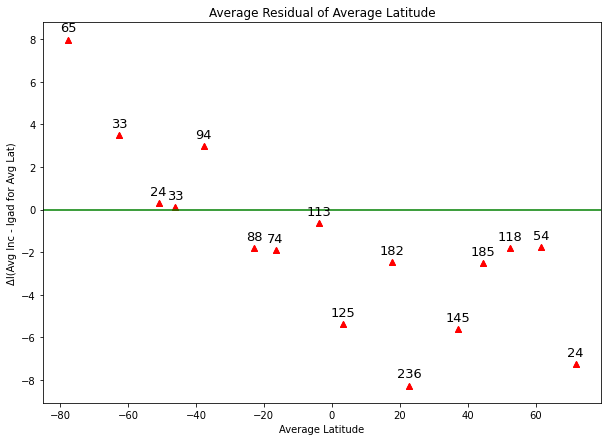

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.xlabel('Average Latitude')
plt.ylabel('ΔI(Avg Inc - Igad for Avg Lat)') 
plt.title('Average Residual of Average Latitude')

xs = SSgroups2["AvgLat"]
ys = SSgroups2["new ΔI"]
ls = pd.to_numeric(pd.Series(SSgroups2["GroupAmount"]))

plt.plot(xs, ys, 'r^')

#zip joins x and y coordinates in pairs
for label, x, y in zip(ls, xs, ys):
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,8), ha = 'center', fontsize=13)

plt.plot(SSgroups2.AvgLat, SSgroups2["new ΔI"], 'r^')
plt.axhline(y=0, color='g')

### This plot depicts the age range within each group

<ErrorbarContainer object of 3 artists>

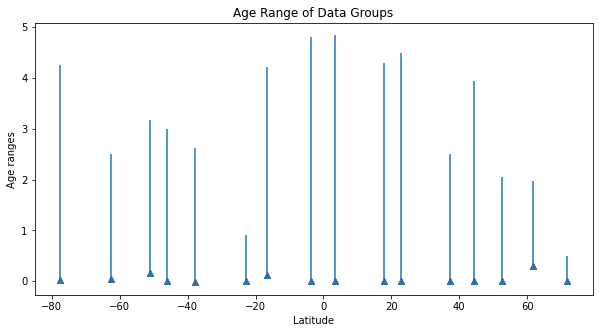

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('Age ranges') 
plt.title('Age Range of Data Groups')

plt.plot(SSgroups2.AvgLat, SSgroups2["MinAge of Group"], 'r^')

lower_error = np.zeros(len(SSgroups2.AvgLat)) #adjusts for how many groups there are 
upper_error = SSgroups2["AgeRange"]
asymmetric_error = [lower_error, upper_error]

plt.errorbar(SSgroups2.AvgLat, SSgroups2["MinAge of Group"], yerr = asymmetric_error, fmt = '^')
#plt.savefig('../figs/' + 'AgeRangeOfGroups.png', dpi=150)

### This plot depicts the average weighted residuals with weighted uncertainty. The group amounts are labeled for each point. The grey line is a curve of best fit. 

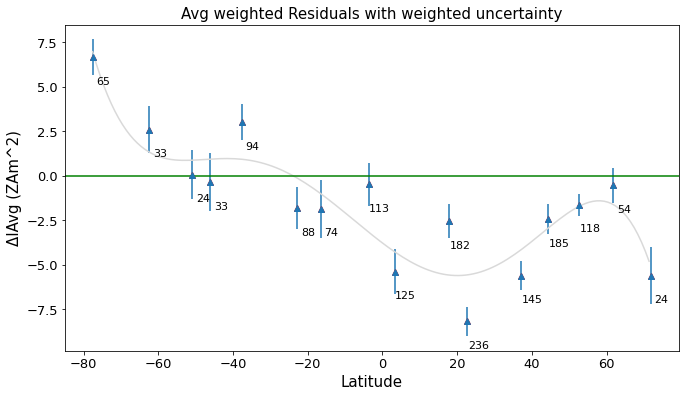

In [63]:
plt.figure(figsize=(11, 6))

plt.xlabel('Latitude', fontsize=15)
plt.ylabel('ΔIAvg (ZAm^2)',fontsize=15) 
plt.title('Avg weighted Residuals with weighted uncertainty',fontsize=15)
plt.tick_params(axis='x',labelsize=13)
plt.tick_params(axis='y',labelsize=13)

xs = SSgroups2["AvgLat"]
ys = SSgroups2["ΔIAvg"]
ls = pd.to_numeric(pd.Series(SSgroups2["GroupAmount"]))

plt.plot(xs, ys, 'r^')

#zip joins x and y coordinates in pairs
for label, x, y in zip(ls, xs, ys):
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(11,-27), ha = 'center', fontsize=11)

from scipy.optimize import curve_fit
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# curve fit
popt, _ = curve_fit(objective, xs, ys)
a, b, c, d, e, f = popt
x_line = np.arange(min(xs), max(xs), 1)
y_line = objective(x_line, a, b, c, d, e, f)

plt.plot(x_line, y_line, c = '0.85')
plt.errorbar(xs, ys, yerr = np.abs(SSgroups2['ΔIstdvWeighted']), fmt = '^')
plt.axhline(y=0, color='g')

plt.savefig('../figs/' + 'PSV10_10degbins_AvgResidualsweightedVSlatitude.png', dpi=150)

### This plot depicts the weighted average residuals with non-weighted uncertainty. 

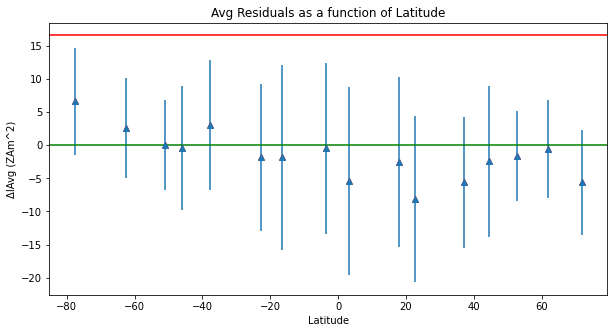

In [64]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('ΔIAvg (ZAm^2)') 
plt.title('Avg Residuals as a function of Latitude')

plt.plot(SSgroups2.AvgLat, SSgroups2.ΔIAvg, 'r^')
plt.errorbar(SSgroups2.AvgLat, SSgroups2.ΔIAvg, yerr = np.abs(SSgroups2['ΔIstdv']), fmt = '^')
plt.axhline(y=igadglobal, color='r')
plt.axhline(y=0, color='g')

#plt.savefig('../figs/' + 'PSV10AvgResidualsVSlatitude.png', dpi=150)

### This plot depicts the Average inclination for the groups

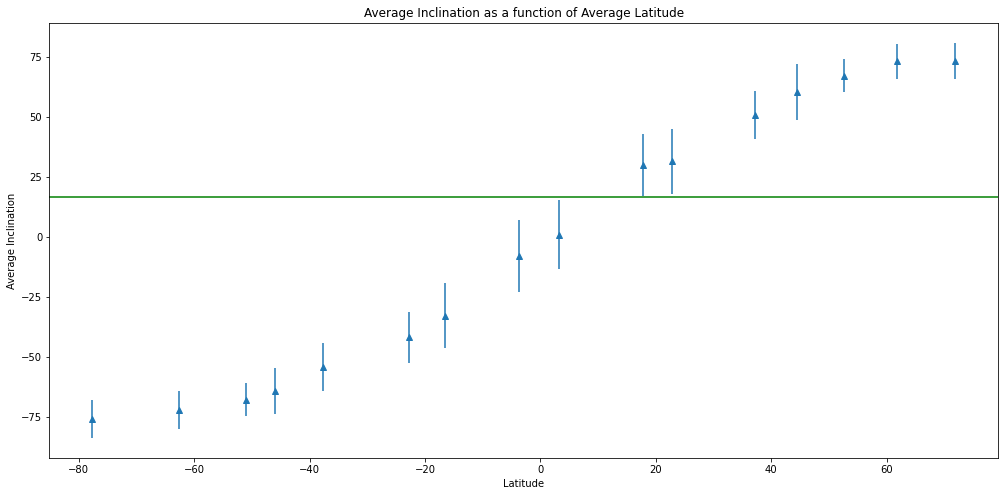

In [65]:
plt.figure(figsize=(17, 8))

plt.xlabel('Latitude')
plt.ylabel('Average Inclination') 
plt.title('Average Inclination as a function of Average Latitude')

plt.errorbar(SSgroups2.AvgLat, SSgroups2.AvgInc, yerr = SSgroups2.AvgIStdv, fmt = '^')
plt.axhline(y=igadglobal, color='g')


# plt.savefig('../figs/' + 'AvgfieldVSavglatitude.png', dpi=150)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

### This plots the average locations for the PINT data, PSV10 with 16 data bins, and PSV10 with 34 data bins.

C:\Users\trin\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:558: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return matplotlib.axes.Axes.draw(self, renderer=renderer, **kwargs)
C:\Users\trin\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:530: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return matplotlib.axes.Axes.get_tightbbox(
C:\Users\trin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


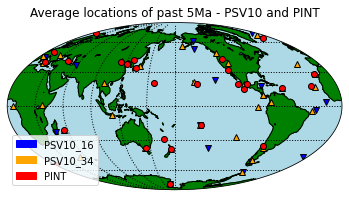

In [67]:
#avg locations 

ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.top_labels = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Average locations of past 5Ma - PSV10 and PINT')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')
ax.plot([SSgroups2.AvgLong.values],[SSgroups2.AvgLat.values],marker='v',color='blue',\
        markersize=6,transform=ccrs.Geodetic(), markeredgecolor='black')

psv10_34 = pd.read_pickle("PSV10_AvgGroups.pkl")

ax.plot([psv10_34.AvgLong.values],[psv10_34.AvgLat.values],marker='^',color='orange',\
        markersize=6,transform=ccrs.Geodetic(), markeredgecolor='black')

pintgroups = pd.read_pickle("PINT_AvgGroups.pkl")
 
ax.plot([pintgroups.AvgLong.values],[pintgroups.AvgLat.values],marker='o',color='red',\
        markersize=6,transform=ccrs.Geodetic(),markeredgecolor='black')

import matplotlib.patches as mpatches
PSV10_16 = mpatches.Patch(color='blue', label='PSV10_16')
PSV10_34 = mpatches.Patch(color='orange', label='PSV10_34')
PINT = mpatches.Patch(color='red', label='PINT')
plt.legend(handles=[PSV10_16,PSV10_34,PINT])

ax.set_global()

ax.coastlines();

plt.savefig('../figs/' + 'psv10both-PINTavglocations5ma.png', dpi=150)

### This plots the average latitudes for the PINT data, PSV10 with 16 data bins, and PSV10 with 34 data bins

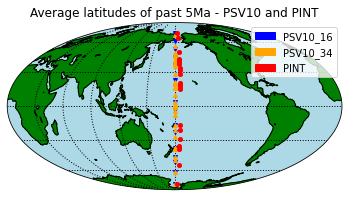

In [68]:
#avg latitudes 

ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.top_labels = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Average latitudes of past 5Ma - PSV10 and PINT')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')
ax.plot(180,[SSgroups2.AvgLat.values],marker='v',color='blue',\
        markersize=4,transform=ccrs.Geodetic())

psv10_34 = pd.read_pickle("PSV10_AvgGroups.pkl")

ax.plot(180,[psv10_34.AvgLat.values],marker='^',color='orange',\
        markersize=4,transform=ccrs.Geodetic())

pintgroups = pd.read_pickle("PINT_AvgGroups.pkl")
 
ax.plot(186,[pintgroups.AvgLat.values],marker='o',color='red',\
        markersize=4,transform=ccrs.Geodetic()) #,markeredgecolor='black')

import matplotlib.patches as mpatches
PSV10_16 = mpatches.Patch(color='blue', label='PSV10_16')
PSV10_34 = mpatches.Patch(color='orange', label='PSV10_34')
PINT = mpatches.Patch(color='red', label='PINT')
plt.legend(handles=[PSV10_16,PSV10_34,PINT])

ax.set_global()

ax.coastlines();

plt.savefig('../figs/' + 'psv10both-PINTavglats5ma.png', dpi=150)

### This table includes the weighted and non-weighted residuals for the groups

In [69]:
data = SSgroups2.copy()

data["AvgLat"] = pd.to_numeric(data["AvgLat"]) #convert AvgLat values from dtype objects to float64 
data["AvgLong"] = pd.to_numeric(data["AvgLong"]) #convert AvgLong values from dtype objects to float64 

data["ResidualWeighted"] = data["ΔIAvg"]/data["ΔIstdvWeighted"] 
data["Residual"] = data["ΔIAvg"]/data["ΔIstdv"] 

data

SITE INFO:,Binn,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group,new ΔI,ΔI(λ),ResidualWeighted,Residual
63,-7,-77.625666,166.776327,-0.156274,-75.832188,7.883650,0.207436,8.081679,1.002409,-83.739835,65,6.643505,4.234000,0.026000,4.260,7.971316,7.907647,6.627540,0.822045
96,-6,-62.567809,-61.044156,-13.752987,-71.980956,8.011549,0.368468,7.536869,1.312000,-75.450909,33,2.584205,2.450000,0.050000,2.500,3.488097,3.469953,1.969667,0.342875
120,-5,-51.013895,-70.577576,-5.155360,-67.678484,7.043254,0.260815,6.811260,1.390343,-67.967250,24,0.060223,3.015000,0.165000,3.180,0.290072,0.288766,0.043315,0.008842
153,-4,-46.056626,-7.088341,2.084152,-64.129313,9.653073,0.287732,9.358010,1.629020,-64.271033,33,-0.350664,2.999824,0.000176,3.000,0.136323,0.141721,-0.215260,-0.037472
247,-3,-37.714817,-138.201894,5.268679,-54.130131,9.948246,0.242308,9.824549,1.013325,-57.114149,94,3.011370,2.654000,-0.024000,2.630,2.967299,2.984018,2.971772,0.306515
335,-2,-22.832494,46.041055,-3.967829,-41.803777,10.557199,0.217893,11.054087,1.178370,-40.099309,88,-1.826549,0.896500,0.008500,0.905,-1.798507,-1.704468,-1.550064,-0.165237
409,-1,-16.585321,-152.258807,2.959027,-32.682232,13.636468,0.270190,14.014879,1.629197,-30.780904,74,-1.850381,4.088000,0.122000,4.210,-1.916397,-1.901328,-1.135763,-0.132030
522,-0,-3.695684,-28.285140,-1.093809,-7.921244,14.912756,0.194849,12.888272,1.212427,-7.360870,113,-0.485836,4.810000,0.000000,4.810,-0.622125,-0.560374,-0.400714,-0.037696
647,+0,3.260484,-17.464527,0.856195,1.062042,14.378343,0.212035,14.154871,1.266050,6.499988,125,-5.389656,4.840000,0.000000,4.840,-5.378814,-5.437946,-4.257063,-0.380763
829,1,17.773315,-84.406739,-1.859125,30.136655,13.037808,0.182323,12.838465,0.951650,32.664030,182,-2.542771,4.300000,0.000000,4.300,-2.446523,-2.527375,-2.671960,-0.198059


### This creates a positive and negative weighted residual table to then plot on a location map with linear scaling. 

In [70]:
import numpy as np 


data1 = data.copy()

data1["RW_rd"] = data1.ResidualWeighted  #copies the values from the ResidualsWeighted to a new column

# Rounds values in new RW_rd column to 1 decimal point
decimals = 1    
data1['RW_rd'] = data1['RW_rd'].apply(lambda x: round(x, decimals))

RW_pos = data1[data1.RW_rd >= 0] # new table only with data that has positive (greater than 0) residuals
RW_neg = data1[data1.RW_rd <= 0] # new table only with data that has negative (less than 0) residuals

RW_neg['RW_rd_abs'] = np.absolute(RW_neg.loc[:,('RW_rd')]) #takes abs value of negative residuals 


data2 = data.copy()

data2["R_rd"] = data2.Residual  #copies the values from the Residuals to a new column

# Rounds values in new R_rd column to 1 decimal point
decimals = 1    
data2['R_rd'] = data2['R_rd'].apply(lambda x: round(x, decimals))

R_pos = data2[data2.R_rd >= 0] # new table only with data that has positive (greater than 0) residuals
R_neg = data2[data2.R_rd <= 0] # new table only with data that has negative (less than 0) residuals

R_neg['R_rd_abs'] = np.absolute(R_neg['R_rd']) #takes abs value of negative residuals 
#R_pos
RW_neg

C:\Users\trin\AppData\Local\Temp/ipykernel_10080/2081272251.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RW_neg['RW_rd_abs'] = np.absolute(RW_neg.loc[:,('RW_rd')]) #takes abs value of negative residuals
C:\Users\trin\AppData\Local\Temp/ipykernel_10080/2081272251.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_neg['R_rd_abs'] = np.absolute(R_neg['R_rd']) #takes abs value of negative residuals


SITE INFO:,Binn,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group,new ΔI,ΔI(λ),ResidualWeighted,Residual,RW_rd,RW_rd_abs
120,-5,-51.013895,-70.577576,-5.155360,-67.678484,7.043254,0.260815,6.811260,1.390343,-67.967250,24,0.060223,3.015000,0.165000,3.180,0.290072,0.288766,0.043315,0.008842,0.0,0.0
153,-4,-46.056626,-7.088341,2.084152,-64.129313,9.653073,0.287732,9.358010,1.629020,-64.271033,33,-0.350664,2.999824,0.000176,3.000,0.136323,0.141721,-0.215260,-0.037472,-0.2,0.2
335,-2,-22.832494,46.041055,-3.967829,-41.803777,10.557199,0.217893,11.054087,1.178370,-40.099309,88,-1.826549,0.896500,0.008500,0.905,-1.798507,-1.704468,-1.550064,-0.165237,-1.6,1.6
409,-1,-16.585321,-152.258807,2.959027,-32.682232,13.636468,0.270190,14.014879,1.629197,-30.780904,74,-1.850381,4.088000,0.122000,4.210,-1.916397,-1.901328,-1.135763,-0.132030,-1.1,1.1
522,-0,-3.695684,-28.285140,-1.093809,-7.921244,14.912756,0.194849,12.888272,1.212427,-7.360870,113,-0.485836,4.810000,0.000000,4.810,-0.622125,-0.560374,-0.400714,-0.037696,-0.4,0.4
647,+0,3.260484,-17.464527,0.856195,1.062042,14.378343,0.212035,14.154871,1.266050,6.499988,125,-5.389656,4.840000,0.000000,4.840,-5.378814,-5.437946,-4.257063,-0.380763,-4.3,4.3
829,1,17.773315,-84.406739,-1.859125,30.136655,13.037808,0.182323,12.838465,0.951650,32.664030,182,-2.542771,4.300000,0.000000,4.300,-2.446523,-2.527375,-2.671960,-0.198059,-2.7,2.7
1065,2,22.717734,-134.417705,0.071827,31.579519,13.578229,0.154975,12.548727,0.816853,39.940973,236,-8.178569,4.499695,0.000305,4.500,-8.253287,-8.361453,-10.012295,-0.651745,-10.0,10.0
1210,3,37.147081,57.599216,0.726371,50.960021,9.936424,0.171646,9.879483,0.820446,56.575566,145,-5.614952,2.499655,0.000345,2.500,-5.607291,-5.615545,-6.843777,-0.568345,-6.8,6.8
1395,4,44.397579,7.987016,0.928132,60.422702,11.566917,0.164571,11.365306,0.835594,62.949946,185,-2.435662,3.942400,0.007600,3.950,-2.517490,-2.527244,-2.914887,-0.214307,-2.9,2.9


### Ranges of the plot

In [71]:
import pygmt

region = [
    data.AvgLong.min() - 1,
    data.AvgLong.max() + 1,
    data.AvgLat.min() - 1,
    data.AvgLat.max() + 1,
]

print(region)
print(data.head())

[-153.25880685208116, 167.7763273440324, -78.62566588253593, 72.7934764440114]
SITE INFO: Binn     AvgLat     AvgLong     AvgDec     AvgInc  AvgIStdv  \
63           -7 -77.625666  166.776327  -0.156274 -75.832188  7.883650   
96           -6 -62.567809  -61.044156 -13.752987 -71.980956  8.011549   
120          -5 -51.013895  -70.577576  -5.155360 -67.678484  7.043254   
153          -4 -46.056626   -7.088341   2.084152 -64.129313  9.653073   
247          -3 -37.714817 -138.201894   5.268679 -54.130131  9.948246   

SITE INFO:  IStdvWeighted    ΔIstdv  ΔIstdvWeighted    AvgIgad  GroupAmount  \
63               0.207436  8.081679        1.002409 -83.739835           65   
96               0.368468  7.536869        1.312000 -75.450909           33   
120              0.260815  6.811260        1.390343 -67.967250           24   
153              0.287732  9.358010        1.629020 -64.271033           33   
247              0.242308  9.824549        1.013325 -57.114149           94   

S

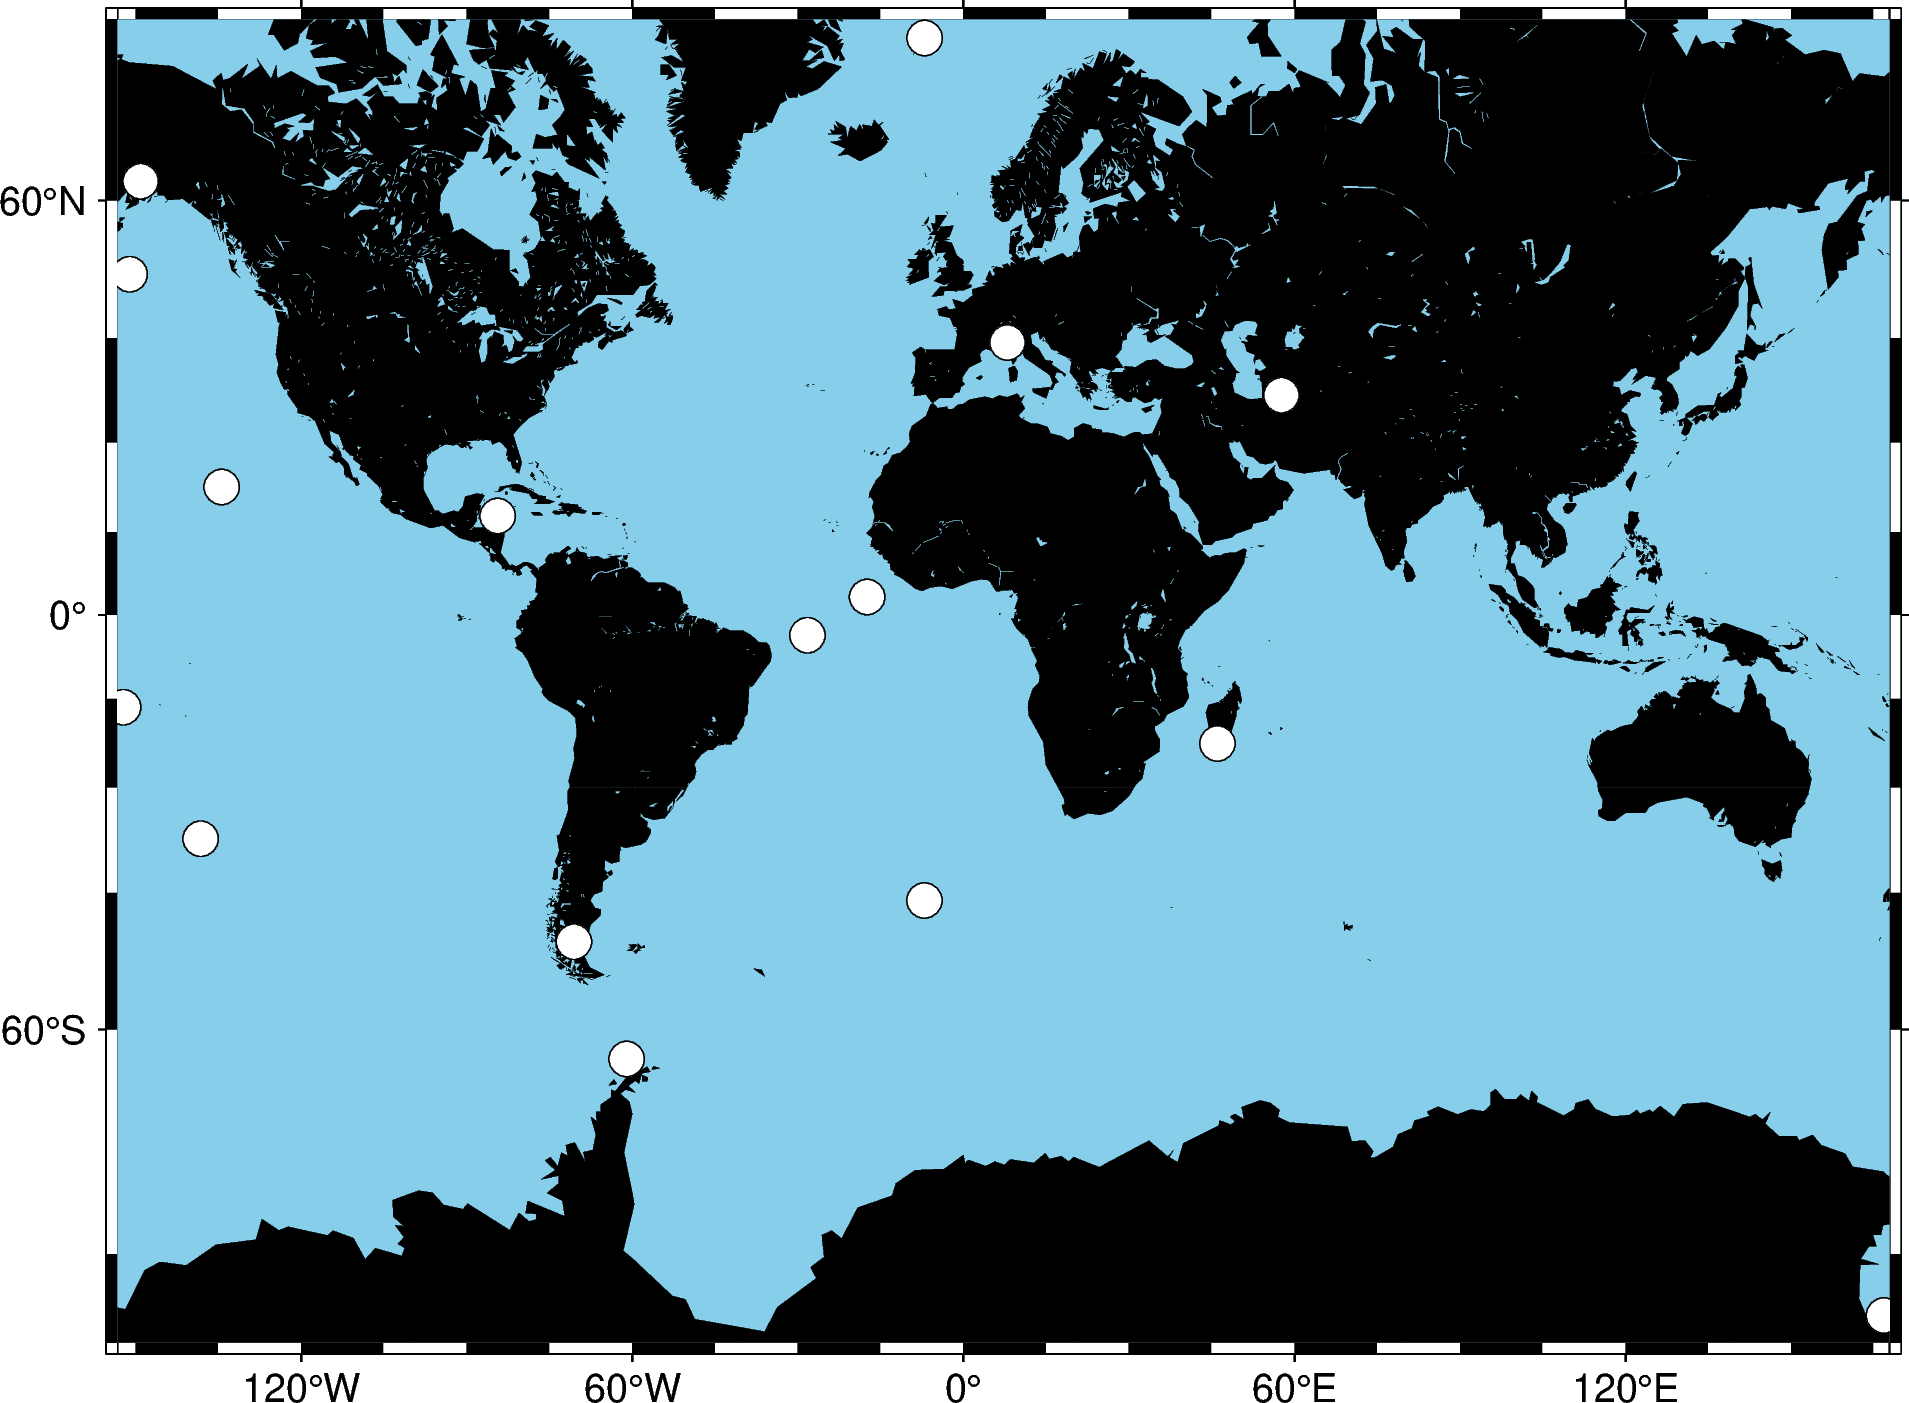

In [72]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
fig.plot(x=data.AvgLong, y=data.AvgLat, style="c0.3c", color="white", pen="black")
fig.show()

### Weighted Residuals plot of PSV10 with 16 data bins. 

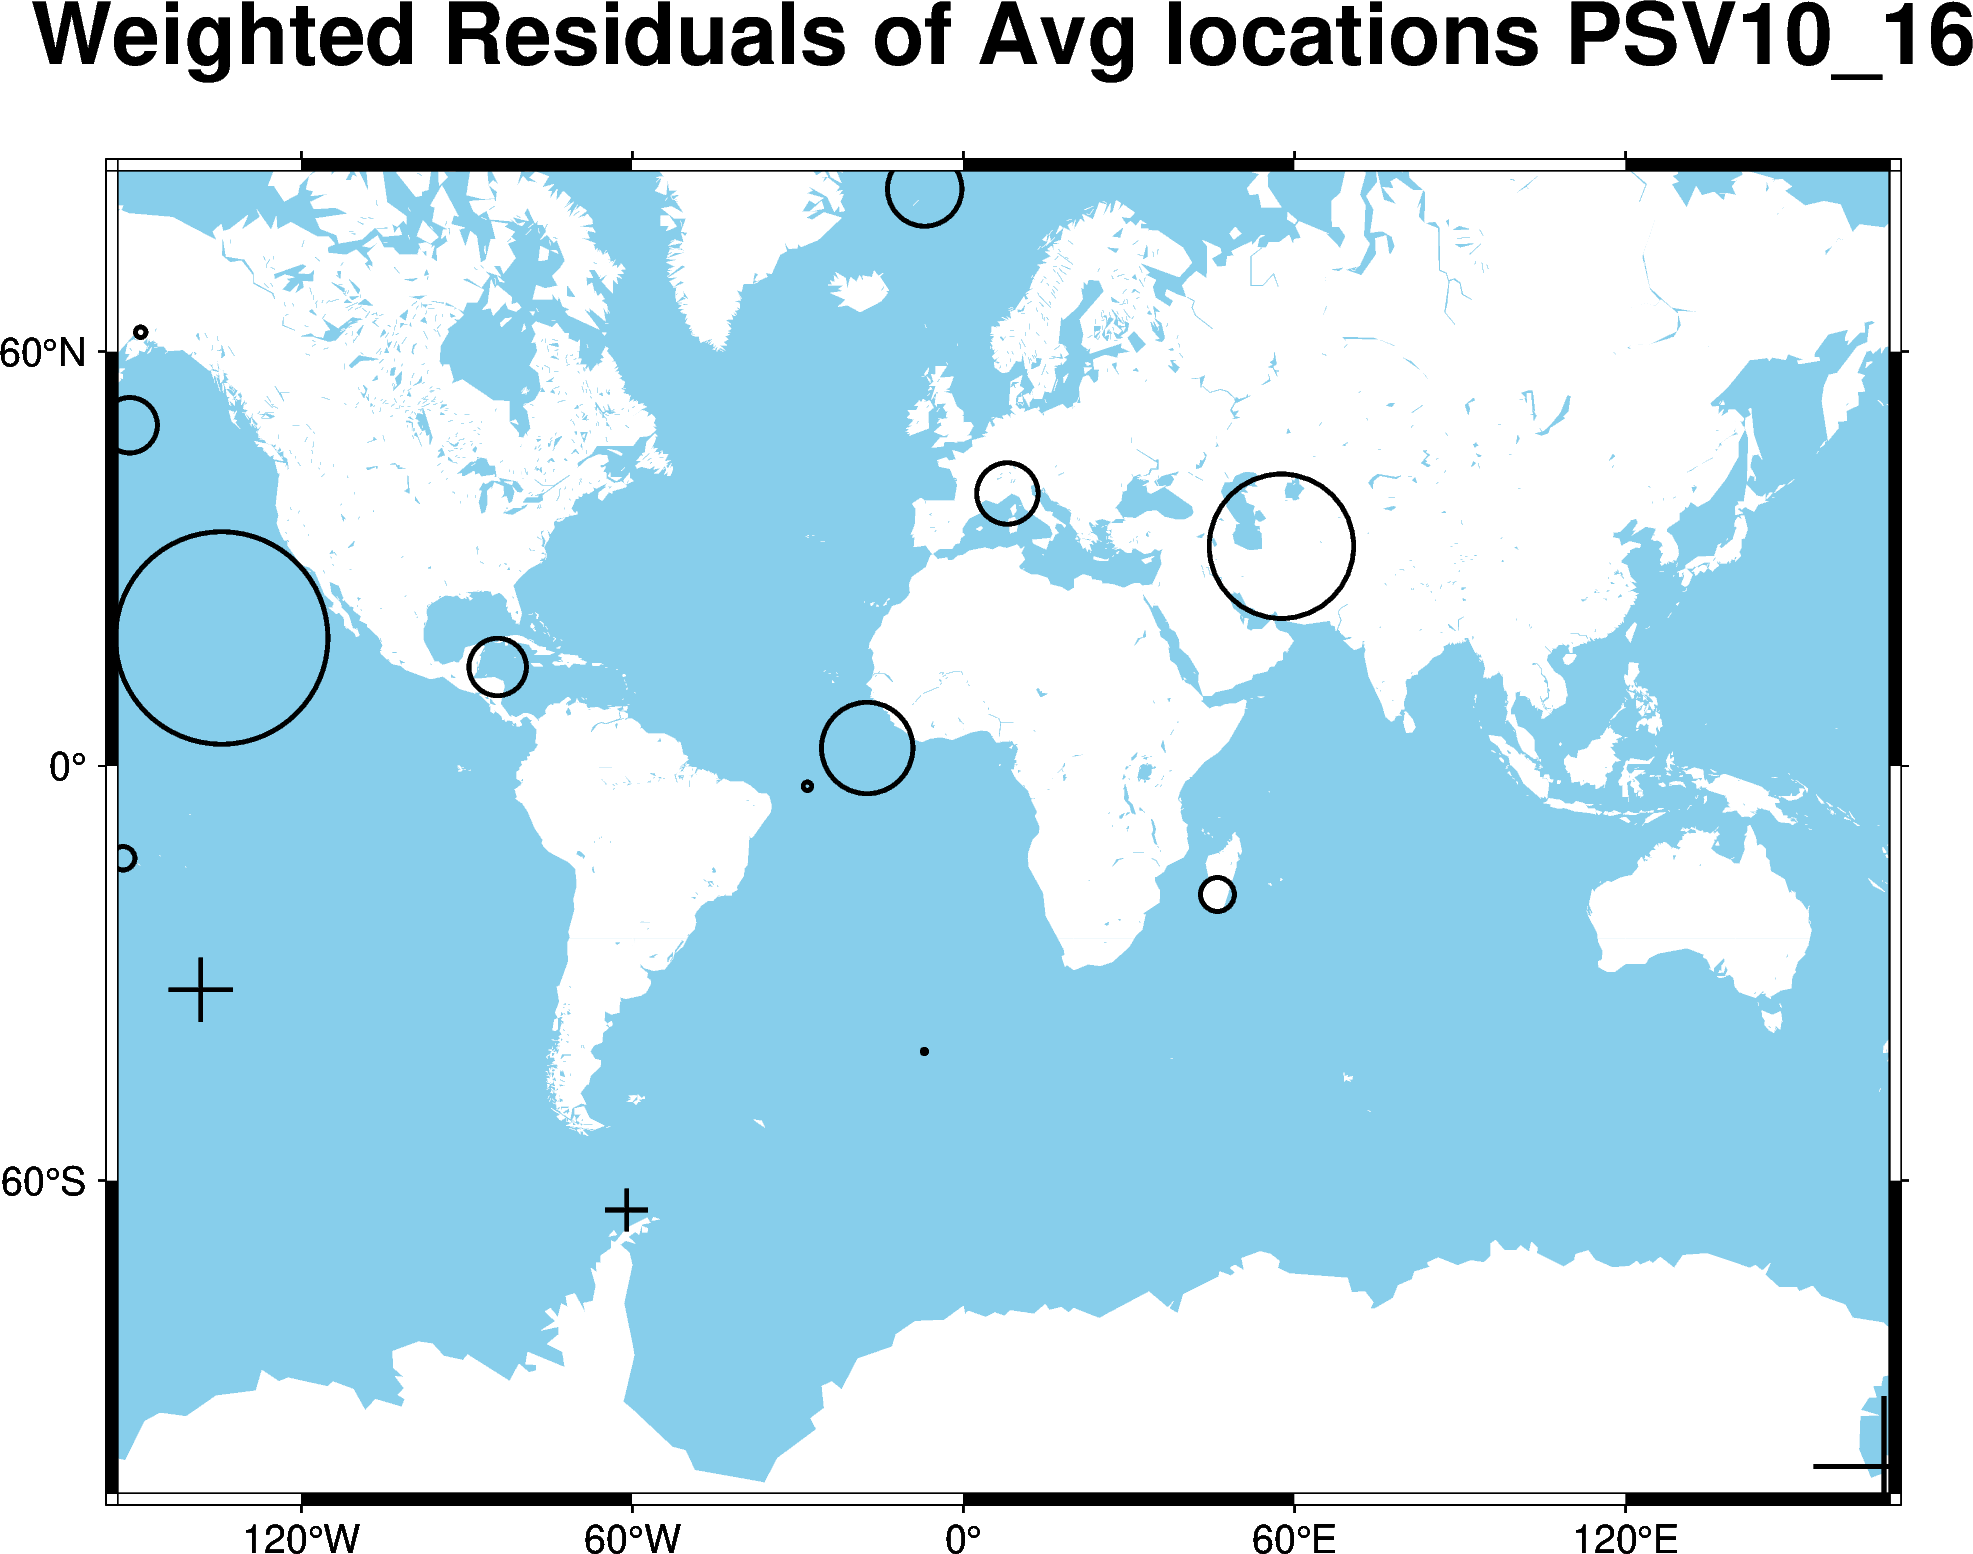

In [73]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="white", water="skyblue")

fig.plot(
   x=RW_neg.AvgLong,
   y=RW_neg.AvgLat, 
   size=0.03 * (6*RW_neg.RW_rd_abs),
   style="cc",
   pen="1p,black") 

fig.plot(
   x=RW_pos.AvgLong,
   y=RW_pos.AvgLat, 
   size=0.03 * (6*RW_pos.RW_rd),
   style="+cc",
   pen="1p,black")

fig.basemap(frame=["a", '+t"Weighted Residuals of Avg locations PSV10_16"'])

fig.show()
fig.savefig('../figs/' + 'PSV10_16Wresidualscaling_all.png', dpi=160)